In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd
# Load the CSV file (replace 'your_file.csv' with the actual file name)
df = pd.read_csv("mogi_tphcm_houses_cleaned_filtered_v2.csv")

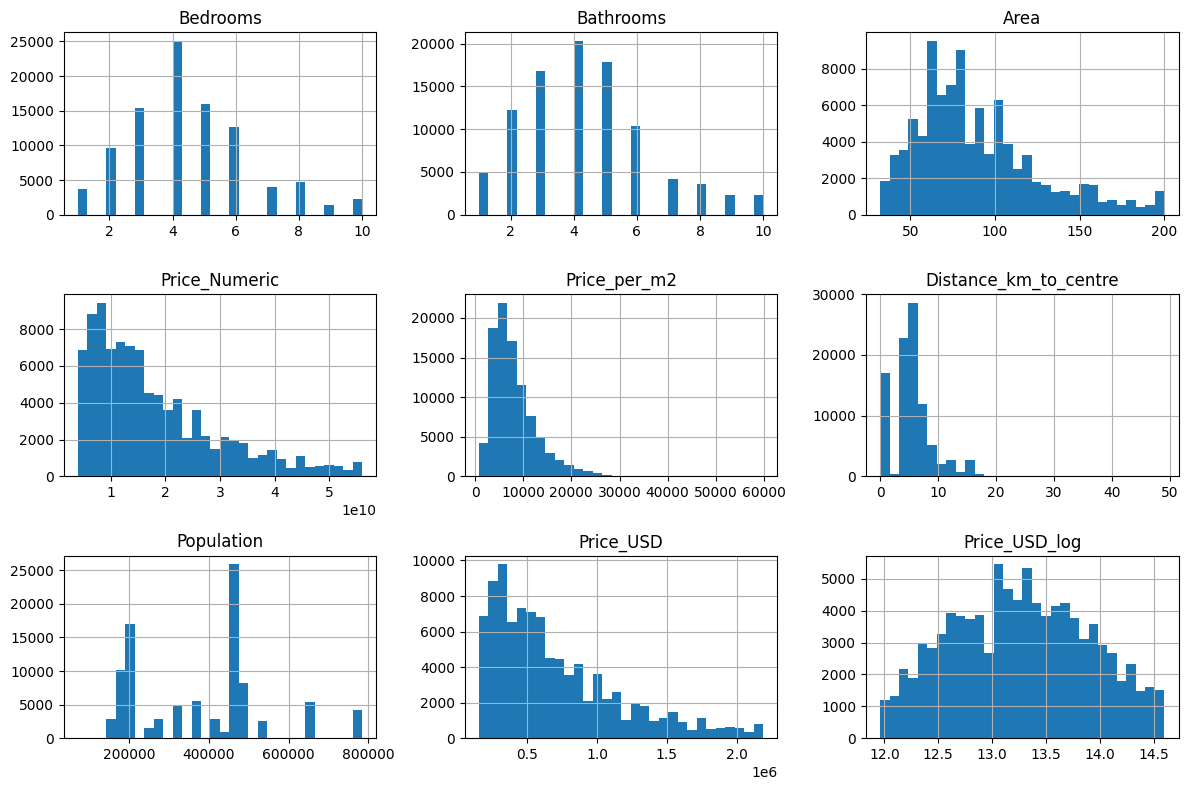

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


In [3]:
df.describe()


,Bedrooms,Bathrooms,Area,Price_Numeric,Price_per_m2,Distance_km_to_centre,Population,Price_USD,Price_USD_log
count,94816.000000,94816.000000,94816.000000,9.481600e+04,94816.000000,94816.000000,94816.000000,9.481600e+04,94816.000000
mean,4.506381,4.364401,88.969646,1.801376e+10,8131.914710,5.467136,383849.987059,7.040064e+05,13.264192
std,1.951590,2.034954,36.281382,1.169649e+10,4734.942485,3.578726,169712.904954,4.571172e+05,0.638399
min,1.000000,1.000000,32.000000,4.000000e+09,801.172447,0.000000,71526.000000,1.563263e+05,11.959707
25%,3.000000,3.000000,63.000000,8.900000e+09,4810.040961,3.340676,193632.000000,3.478261e+05,12.759461
50%,4.000000,4.000000,80.000000,1.450000e+10,6978.854072,5.898625,427083.000000,5.666830e+05,13.247557
75%,6.000000,5.000000,107.000000,2.400000e+10,10161.211529,6.984046,474792.000000,9.379580e+05,13.751462
max,10.000000,10.000000,200.000000,5.600000e+10,59843.673669,49.068109,784173.000000,2.188569e+06,14.598759


In [29]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Apply log1p transformation to the target variable (Price_USD)
y = np.log1p(df['Price_USD'])

# Sample Data 
X = df[['Bedrooms', 'Bathrooms', 'Area', 'Population', 'Distance_km_to_centre']]

# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the training data
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=600, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

In [31]:
# Inverse the log1p transformation to get the predicted and actual prices in the original scale
y_pred_exp = np.expm1(y_pred)  # Exponentiate to get the predicted price in original scale
y_test_exp = np.expm1(y_test)  # Exponentiate to get the actual price in original scale

In [32]:
# Calculate errors on the original scale
mse = mean_squared_error(y_test_exp, y_pred_exp)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")  # Closer to 1 means better fit

Mean Squared Error (MSE): 72369495728.6579
Mean Absolute Error (MAE): 186087.19988318777
R² Score: 0.6532718425412973


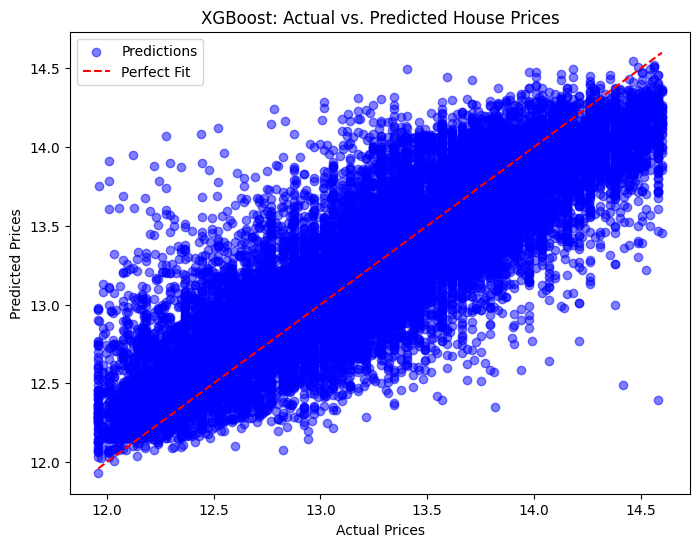

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost: Actual vs. Predicted House Prices")
plt.legend()
plt.show()

